data pre-processing and data sampling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

In [2]:
def modify(value):
    return dt.strptime('190'+value, '%Y-%m')

In [3]:
sales = pd.DataFrame(pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=modify))
sales=sales.dropna()
sales.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [4]:
sales.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


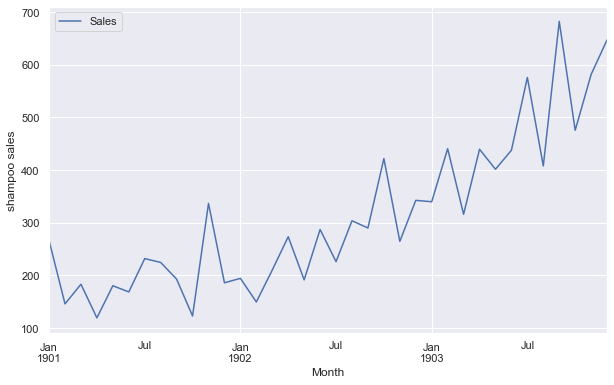

In [5]:
sns.set()
sales.plot(figsize=(10,6))
plt.ylabel('shampoo sales')
plt.legend()
plt.show()

In [9]:
array = ['T','H','D'] #upsampling into minutes,hourly,daily data respectively
upscaled_samples = []

for i in array:
    upsample = sales.resample(i).interpolate()
    upscaled_samples.append(upsample)
    
for i in upscaled_samples:
    print(i.head(3),end="\n\n")

                          Sales
Month                          
1901-01-01 00:00:00  266.000000
1901-01-01 00:01:00  265.997310
1901-01-01 00:02:00  265.994619

                          Sales
Month                          
1901-01-01 00:00:00  266.000000
1901-01-01 01:00:00  265.838575
1901-01-01 02:00:00  265.677151

                 Sales
Month                 
1901-01-01  266.000000
1901-01-02  262.125806
1901-01-03  258.251613



In [10]:
# weekly data sampling 

upsample = sales.resample('D').interpolate()[::7]
upscaled_samples.append(upsample)

print(upsample.head(3))

                 Sales
Month                 
1901-01-01  266.000000
1901-01-08  238.880645
1901-01-15  211.761290


In [11]:
#down-sampling average quarterly sales and total yearly sales 

quarterly_mean_sales = sales.resample('Q').mean()
yearly_total_sales = sales.resample('A').sum()

upscaled_samples.append(quarterly_mean_sales)
upscaled_samples.append(yearly_total_sales)


print(quarterly_mean_sales.head(),end="\n\n")
print(yearly_total_sales.head())

                 Sales
Month                 
1901-03-31  198.333333
1901-06-30  156.033333
1901-09-30  216.366667
1901-12-31  215.100000
1902-03-31  184.633333

             Sales
Month             
1901-12-31  2357.5
1902-12-31  3153.5
1903-12-31  5742.6


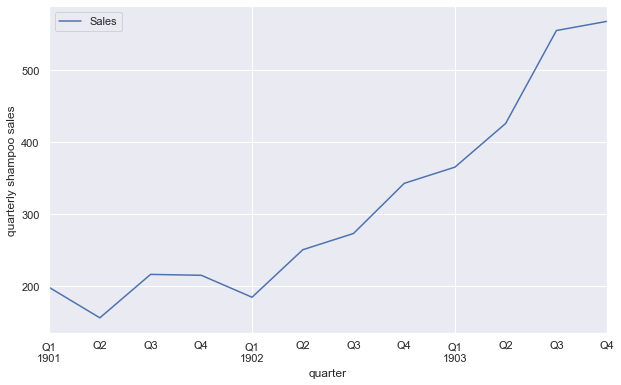

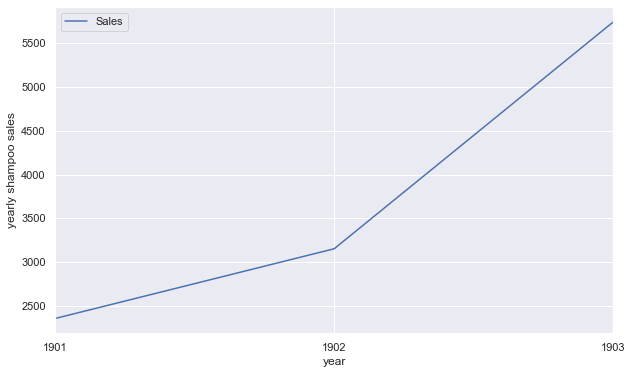

In [12]:
quarterly_mean_sales.plot(figsize=(10,6))
plt.xlabel('quarter')
plt.ylabel('quarterly shampoo sales')
yearly_total_sales.plot(figsize=(10,6))
plt.xlabel('year')
plt.ylabel('yearly shampoo sales')
plt.legend()
plt.show()

step 2 : data analysis and forecasting 

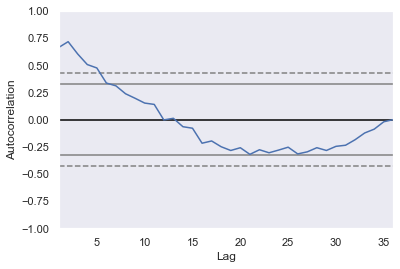

In [13]:
#data analyis using autocorrelation

pd.plotting.autocorrelation_plot(sales) #autocorrelation plot to analyze the values of AR and MA for ARIMA model
plt.show()

In [14]:
#using auto_arima to find optimal order for the dataset

from pmdarima import auto_arima

model = auto_arima(sales,trace=True,supress_warning=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.464, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -195.732
Date:                Thu, 25 Feb 2021   AIC                            401.464
Time:                        14:19:40   BIC                            409.241
Sample:                             0   HQIC                           404.149
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3816      6.183      1.517      0.129      -2.736      21.499
ar.L1          0.0846      0.316      0.268      0.789      -0.534       0.704
ma.L1         -1.3790      0.288     -4.792      0.000      -1.943      -0.815
ma.L2          0.9345      0.407      2.294      0.022       0.136       1.733
sigma2      3717.3076   1369.775      2.714      0.007    1032.598    6402.018
===================================================================================
Ljung-Box (Q):                       33.40   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.50   Prob(JB):                         0.68
Heteroskedasticity (H):               0.95   Skew:                             0.30
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#split the data into train and test set and use it to train the model 

from sklearn.model_selection import train_test_split
import warnings 

warnings.filterwarnings('ignore')

train , test = train_test_split(sales,shuffle=False,test_size=0.20)


model = ARIMA(train, order=(1,1,2))  # ar=1 , diff=1 , ma=2
model = model.fit(disp=1)
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   27
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -148.455
Method:                       css-mle   S.D. of innovations             57.389
Date:                Thu, 25 Feb 2021   AIC                            306.911
Time:                        14:19:40   BIC                            313.390
Sample:                    02-01-1901   HQIC                           308.837
                         - 04-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0000      2.604      3.072      0.002       2.896      13.104
ar.L1.D.Sales    -0.9115      0.125     -7.310      0.000      -1.156      -0.667
ma.L1.D.Sales    -0.0943      0.228     

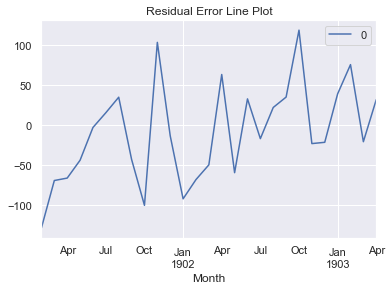

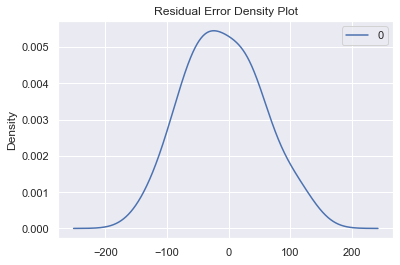

                0
count   27.000000
mean    -8.991541
std     61.809409
min   -128.099983
25%    -54.378017
50%    -16.758147
75%     33.931988
max    118.719390


In [16]:
#plot the residual error line and density plot for the trained model

residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.title('Residual Error Line Plot')
plt.show()

residuals.plot(kind='kde')
plt.title('Residual Error Density Plot')
plt.show()
print(residuals.describe())

In [17]:
#forecasting the test results and using different metrics to evaluate 

from sklearn.metrics import mean_squared_error,r2_score,median_absolute_error

predictions = list()
history = [x for x in train['Sales']]


for t in range(len(test)):
	model = ARIMA(history, order=(1,1,2))
	model = model.fit()
	output = model.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test['Sales'][t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
rmse = np.sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)
mae = median_absolute_error(test, predictions)


print('\n\nTest RMSE score: %.3f' % rmse)
print('Test R2 score: %.3f' % r2)
print('Test MAE score: %.3f' % mae)

predicted=349.771449, expected=401.300000
predicted=424.872822, expected=437.400000
predicted=443.489975, expected=575.500000
predicted=439.762873, expected=407.600000
predicted=558.702200, expected=682.000000
predicted=527.205389, expected=475.300000
predicted=661.926872, expected=581.300000
predicted=646.794845, expected=646.900000


Test RMSE score: 75.557
Test R2 score: 0.459
Test MAE score: 51.717


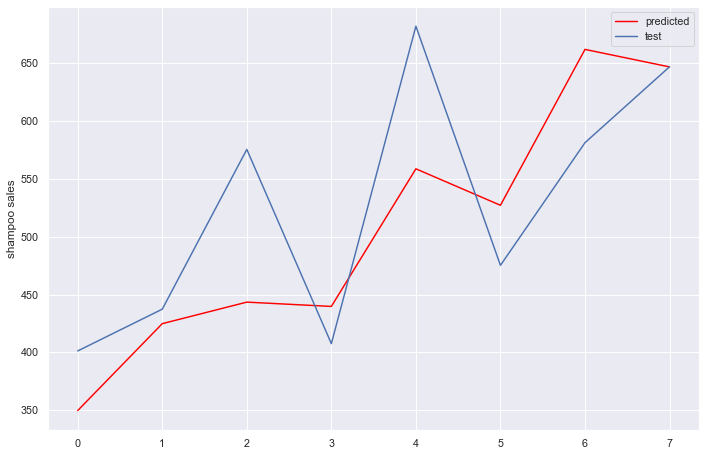

In [18]:
plt.figure(figsize=(12,8),dpi=70)
plt.plot(predictions, color='red',label='predicted')
plt.plot(test['Sales'].values,label='test')
plt.ylabel('shampoo sales')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-162503.836, Time=2.28 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-162511.836, Time=1.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-162509.836, Time=1.00 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-162509.836, Time=0.58 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-162507.836, Time=0.74 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-162509.861, Time=3.29 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 8.890 seconds


Test RMSE score: 0.015
Test R2 score: 1.000
Test MAE score: 0.000


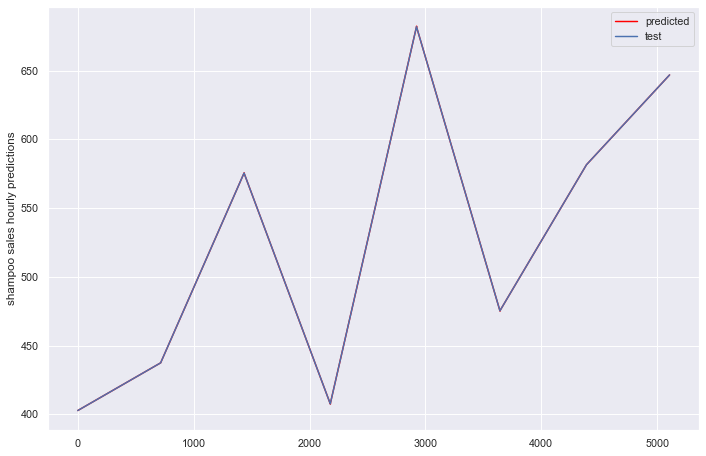

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3316.536, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5711.572, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3351.620, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4699.743, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5720.418, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3353.980, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3315.538, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3352.796, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3352.745, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3316.600, Time=1.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3353.817, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3320.961, Time=1.32 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3319.708, Time=0.35 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 6.148 seconds


Test RMSE score: 1.7

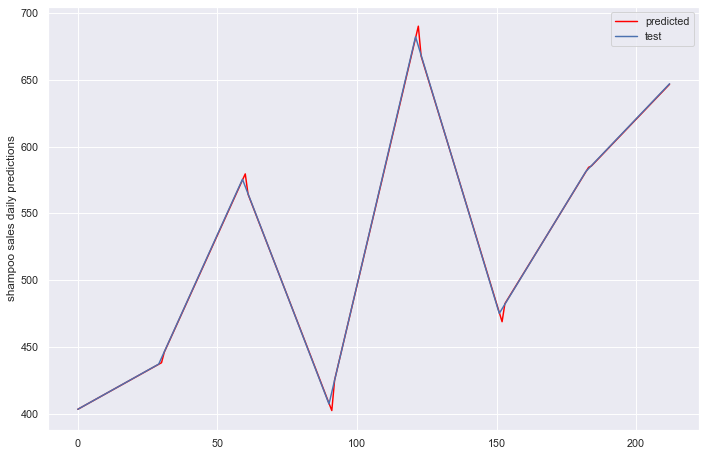

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1392.090, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1297.060, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1287.415, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1391.843, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1276.214, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1238.090, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1267.017, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1236.252, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1250.824, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1197.691, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1203.396, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1190.803, Time=0.36 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1190.469, Time=0.19 sec
 ARIMA(5,1,0)(0,0,0)[0]             : 

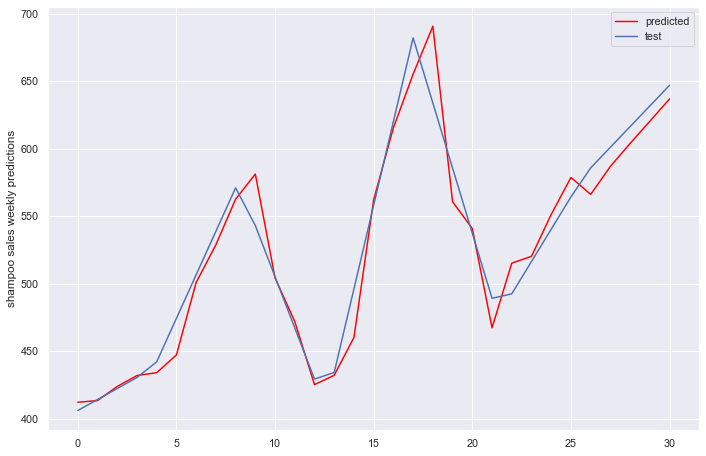

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=120.080, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=121.771, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=121.829, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=122.565, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=123.764, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.296 seconds


Test RMSE score: 65.492
Test R2 score: -0.045
Test MAE score: 39.792


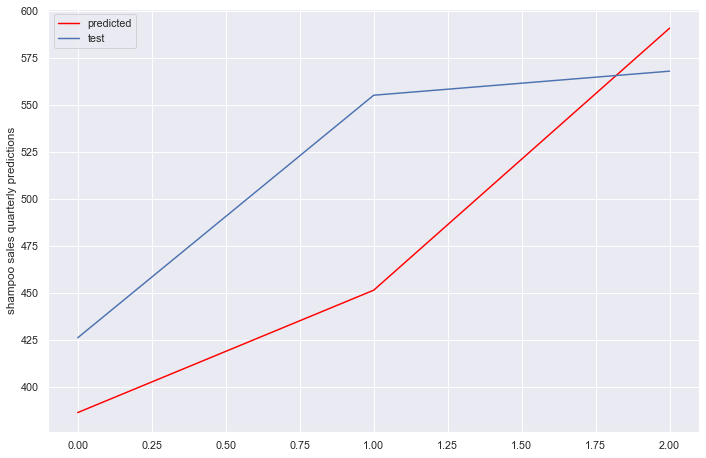

In [19]:
#similary we will train a model for the sampled hourly ,daily , weekly , quarterly data 

#we will use upscaled_samples array , which stores all the sampled data to extract ones we need

samples = [upscaled_samples[1],upscaled_samples[2],upscaled_samples[3],upscaled_samples[4]]
label = ['hourly predictions','daily predictions','weekly predictions','quarterly predictions']
c=0

for i in samples:
    model = auto_arima(i,trace=True,supress_warning=True)
    p,d,q = model.get_params()['order']
    train , test = train_test_split(i,shuffle=False,test_size=0.20)

    predictions = list()
    history = [x for x in train['Sales']]
    

    for t in range(len(test)):
        model = ARIMA(history, order=(p,d,q))
        model = model.fit()
        output = model.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test['Sales'][t]
        history.append(obs)
        
    rmse = np.sqrt(mean_squared_error(test, predictions))
    r2 = r2_score(test, predictions)
    mae = median_absolute_error(test, predictions)
        
    print('\n\nTest RMSE score: %.3f' % rmse)
    print('Test R2 score: %.3f' % r2)
    print('Test MAE score: %.3f' % mae)
        
    plt.figure(figsize=(12,8),dpi=70)
    plt.plot(predictions, color='red',label='predicted')
    plt.plot(test['Sales'].values,label='test')
    plt.ylabel('shampoo sales '+label[c])
    c+=1
    plt.legend()
    plt.show()